In [ ]:
import cv2
import tensorflow as tf
import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
apple_data = os.listdir("/content/drive/MyDrive/neiron lab/Bozenova/lab4/fruit dataset/Apple")
cherry_data = os.listdir("/content/drive/MyDrive/neiron lab/Bozenova/lab4/fruit dataset/cherry")
strawberries_data = os.listdir("/content/drive/MyDrive/neiron lab/Bozenova/lab4/fruit dataset/strawberries")
print(apple_data[:10])
print(cherry_data[:10])
print(strawberries_data[:10])

['img_1451.jpeg', 'img_1341.jpeg', 'img_1351.jpeg', 'img_171.jpeg', 'img_1121.jpeg', 'img_1781.jpeg', 'img_1261.jpeg', 'img_1401.jpeg', 'img_1621.jpeg', 'img_1241.jpeg']
['img_1291.jpeg', 'img_1401.jpeg', 'img_1161.jpeg', 'img_1141.jpeg', 'img_1411.jpeg', 'img_1551.jpeg', 'img_1491.jpeg', 'img_1261.jpeg', 'img_1281.jpeg', 'img_1501.jpeg']
['img_1221.jpeg', 'img_1331.jpeg', 'img_1141.jpeg', 'img_1131.jpeg', 'img_1291.jpeg', 'img_11.jpeg', 'img_1281.jpeg', 'img_1411.jpeg', 'img_1081.jpeg', 'img_1071.jpeg']


In [ ]:
def show_img(path, img_data, count, title_name):
  plt.figure(figsize = (12, 12))
  for i in range(6):
    plt.subplot(1, 6, i+1)
    img = cv2.imread(path + img_data[i + count], cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(title_name)
    plt.tight_layout
  plt.show()

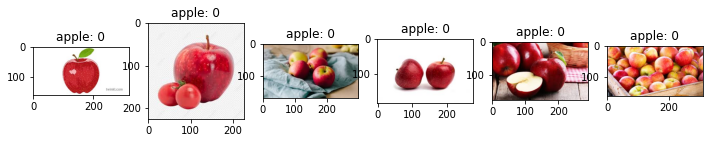

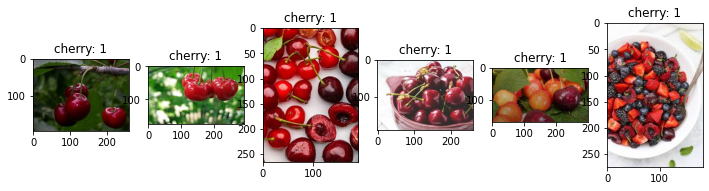

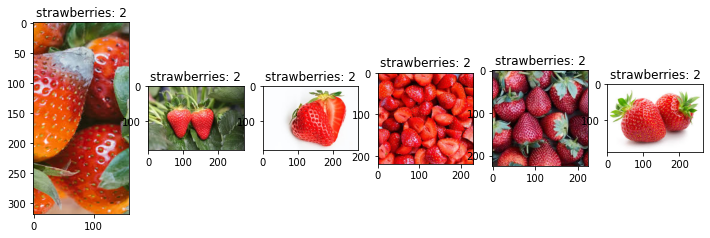

In [ ]:
show_img("/content/drive/MyDrive/neiron lab/Bozenova/lab4/fruit dataset/Apple/", apple_data, 0, "apple: 0")
show_img("/content/drive/MyDrive/neiron lab/Bozenova/lab4/fruit dataset/cherry/", cherry_data, 0, "cherry: 1")
show_img("/content/drive/MyDrive/neiron lab/Bozenova/lab4/fruit dataset/strawberries/", strawberries_data, 0, "strawberries: 2")

In [ ]:
def add_img(data, labels, count, images, path, app):
  for img in red_data:
  if count == 150:
    count = 0
    break
  img_read = cv2.imread(images + img)
  img_read = cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB)
  img_resize = cv2.resize(img_read, (64, 64))
  data.append(img_resize)
  labels.append(0)
  count+=1
  if count % 50 == 0:
    print(count)
  return data, labels, count

In [ ]:
data = []
labels = []
count = 0

data, labels, count = add_img(data, labels, count, apple_data, "/content/drive/MyDrive/neiron lab/Bozenova/lab4/fruit dataset/Apple/", 0)
data, labels, count = add_img(data, labels, count, cherry_data, "/content/drive/MyDrive/neiron lab/Bozenova/lab4/fruit dataset/cherry/" , 1)
data, labels, count = add_img(data, labels, count, strawberries_data,"/content/drive/MyDrive/neiron lab/Bozenova/lab4/fruit dataset/strawberries/" , 2)


print(data[0].shape)

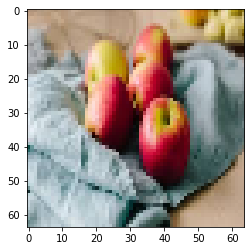

In [ ]:
plt.imshow(data[2])
plt.show()

In [ ]:
x_trn, x_tst, y_trn, y_tst = train_test_split(data, labels, test_size = 0.2, shuffle=True, random_state = 42)

In [ ]:
x_train = np.array(x_trn, np.float32)/ 255.
x_test = np.array(x_tst, np.float32)/ 255.

y_train = np.array(y_trn)
y_test = np.array(y_tst)
#y_test = tf.one_hot(y_tst, depth=2)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(120, 64, 64, 3)
(120,)


In [ ]:
def create_model():
  model = models.Sequential()
  model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  return model

In [ ]:
model1 = create_model()
model2 = create_model()
model3 = create_model()

In [ ]:
#model1.summary()

In [ ]:
history1 = model1.fit(x_train, y_train, batch_size = 1, epochs = 50,
                    validation_data=(x_test, y_test))

Epoch 1/50
120/120 [==============================] - 4s 19ms/step - loss: 1.1235 - accuracy: 0.3417 - val_loss: 1.0978 - val_accuracy: 0.3667
Epoch 2/50
120/120 [==============================] - 2s 15ms/step - loss: 1.0999 - accuracy: 0.3333 - val_loss: 1.0937 - val_accuracy: 0.3667
Epoch 3/50
120/120 [==============================] - 2s 15ms/step - loss: 1.1140 - accuracy: 0.3750 - val_loss: 1.0827 - val_accuracy: 0.3000
Epoch 4/50
120/120 [==============================] - 2s 15ms/step - loss: 1.1156 - accuracy: 0.4333 - val_loss: 1.0920 - val_accuracy: 0.4333
Epoch 5/50
120/120 [==============================] - 2s 15ms/step - loss: 1.0327 - accuracy: 0.4917 - val_loss: 1.3376 - val_accuracy: 0.3667
Epoch 6/50
120/120 [==============================] - 2s 17ms/step - loss: 1.0827 - accuracy: 0.5000 - val_loss: 0.9505 - val_accuracy: 0.5667
Epoch 7/50
120/120 [==============================] - 3s 24ms/step - loss: 1.0029 - accuracy: 0.4667 - val_loss: 1.0183 - val_accuracy: 0.5333

In [ ]:
history2 = model2.fit(x_train, y_train, batch_size = 32, epochs= 50,
                    validation_data=(x_test, y_test))

Epoch 1/50
4/4 [==============================] - 2s 315ms/step - loss: 1.1105 - accuracy: 0.3667 - val_loss: 1.1087 - val_accuracy: 0.3000
Epoch 2/50
4/4 [==============================] - 1s 257ms/step - loss: 1.0944 - accuracy: 0.3667 - val_loss: 1.0729 - val_accuracy: 0.4000
Epoch 3/50
4/4 [==============================] - 1s 257ms/step - loss: 1.0431 - accuracy: 0.4667 - val_loss: 1.0448 - val_accuracy: 0.3333
Epoch 4/50
4/4 [==============================] - 1s 263ms/step - loss: 0.9964 - accuracy: 0.4833 - val_loss: 0.9654 - val_accuracy: 0.5000
Epoch 5/50
4/4 [==============================] - 1s 251ms/step - loss: 0.9141 - accuracy: 0.6083 - val_loss: 0.9926 - val_accuracy: 0.5000
Epoch 6/50
4/4 [==============================] - 1s 266ms/step - loss: 0.8490 - accuracy: 0.6000 - val_loss: 0.8503 - val_accuracy: 0.6000
Epoch 7/50
4/4 [==============================] - 2s 485ms/step - loss: 0.7317 - accuracy: 0.6917 - val_loss: 0.9109 - val_accuracy: 0.4000
Epoch 8/50
4/4 [====

In [ ]:
history3 = model3.fit(x_train, y_train, batch_size = 128, epochs=50,
                    validation_data=(x_test, y_test))

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.1091 - accuracy: 0.3500 - val_loss: 1.1053 - val_accuracy: 0.3667
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 1.0955 - accuracy: 0.3250 - val_loss: 1.1070 - val_accuracy: 0.4333
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 1.0756 - accuracy: 0.4167 - val_loss: 1.0990 - val_accuracy: 0.3667
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 1.0500 - accuracy: 0.5333 - val_loss: 1.0893 - val_accuracy: 0.3333
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 1.0090 - accuracy: 0.5833 - val_loss: 1.0679 - val_accuracy: 0.4333
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 0.9583 - accuracy: 0.7000 - val_loss: 1.0414 - val_accuracy: 0.4667
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.9035 - accuracy: 0.6750 - val_loss: 1.2126 - val_accuracy: 0.3000
Epoch 8/50
1/1 [=========================

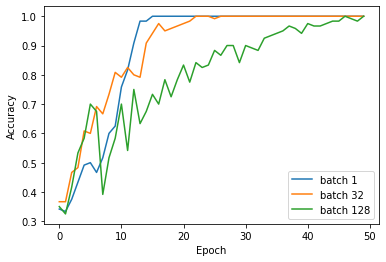

In [ ]:
plt.plot(history1.history['accuracy'], label='batch 1')
plt.plot(history2.history['accuracy'], label='batch 32')
plt.plot(history3.history['accuracy'], label='batch 128')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

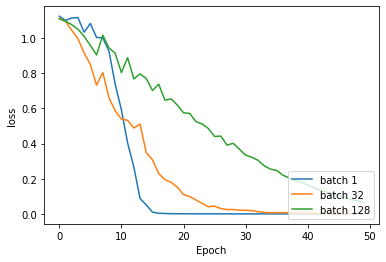

In [ ]:
plt.plot(history1.history['loss'], label='batch 1')
plt.plot(history2.history['loss'], label='batch 32')
plt.plot(history3.history['loss'], label='batch 128')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')